# 1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 2.Import Dataset

In [2]:
air_lines=pd.read_excel('EastWestAirlines.xlsx',sheet_name="data")
air_lines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# 3.Data Understanding | EDA

In [3]:
air_lines.shape

(3999, 12)

In [4]:
air_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
air_lines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
air_lines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
air_lines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
air_lines = air_lines.rename(columns={'Award?':'Award'})

In [9]:
air_lines.drop('ID#',axis=1,inplace=True)

# Standardizing 

In [10]:
std_scaler=StandardScaler()
scaled=std_scaler.fit_transform(air_lines)


# Hierarchical clustering

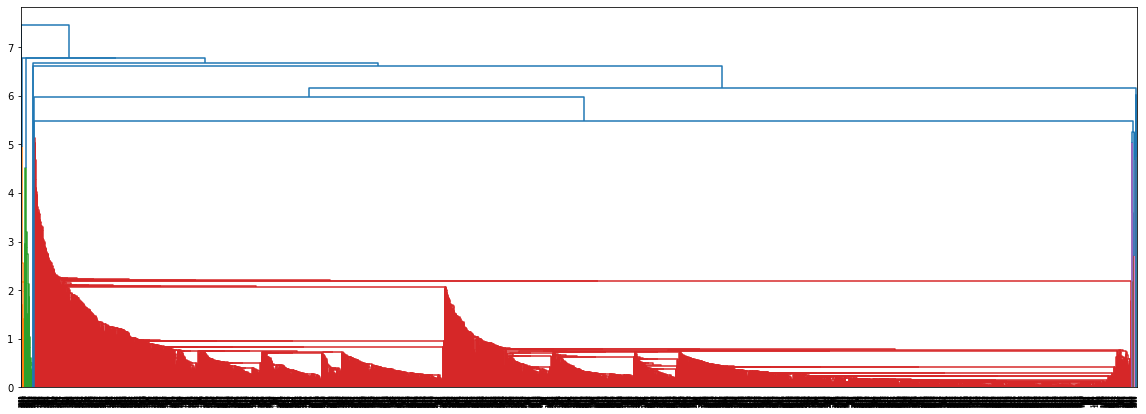

In [16]:
plt.figure(figsize=(20,7))
dendogram=sch.dendrogram(sch.linkage(scaled,'single'))
plt.show()

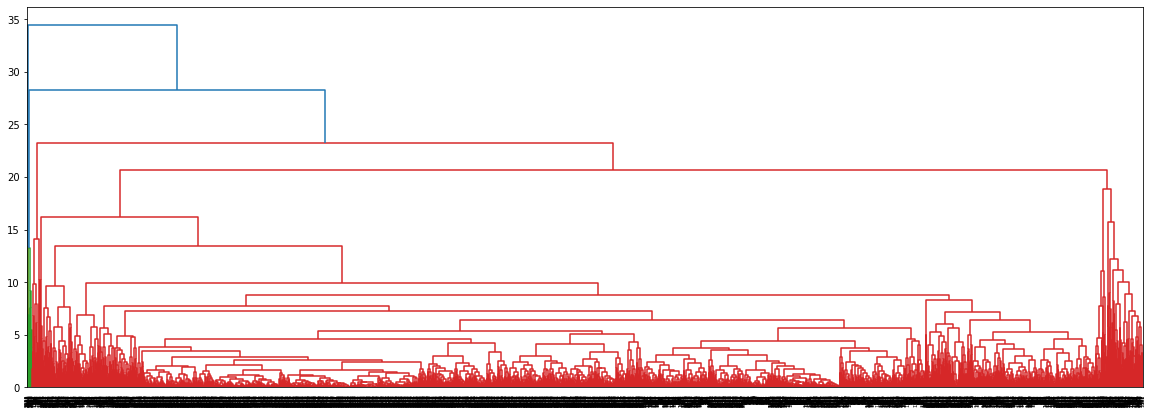

In [17]:
plt.figure(figsize=(20,7))
dendogram=sch.dendrogram(sch.linkage(scaled,'complete'))
plt.show()

In [18]:
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [28]:
y=pd.DataFrame(cluster.fit_predict(scaled),columns=['Clustersid'])
y['Clustersid'].value_counts()

0    3955
1      28
2      15
3       1
Name: Clustersid, dtype: int64

In [29]:
air_lines_1=air_lines.copy()
air_lines_1['clusters']=cluster.labels_

In [30]:
air_lines_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


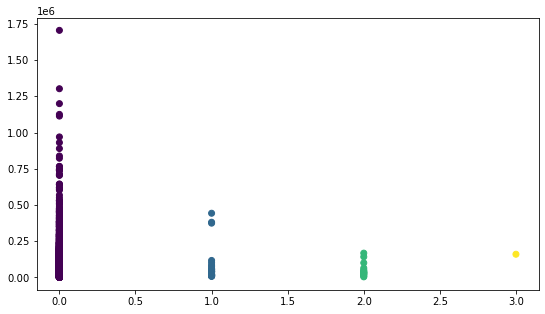

In [99]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_1['clusters'],air_lines['Balance'], c=cluster.labels_)

# K-Means 

## Getting optimal value for no.of clusters

# Elbow Method

In [32]:
from sklearn.cluster import KMeans

In [38]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=99)
    model=model.fit(scaled)
    wcss.append(model.inertia_)
wcss

[43989.000000000015,
 35409.51662986132,
 30900.825326395407,
 27155.186988569552,
 23700.392365058273,
 21757.196767176556,
 18891.852514138518,
 17316.68853135225,
 15963.609073080937,
 14727.935166347475]

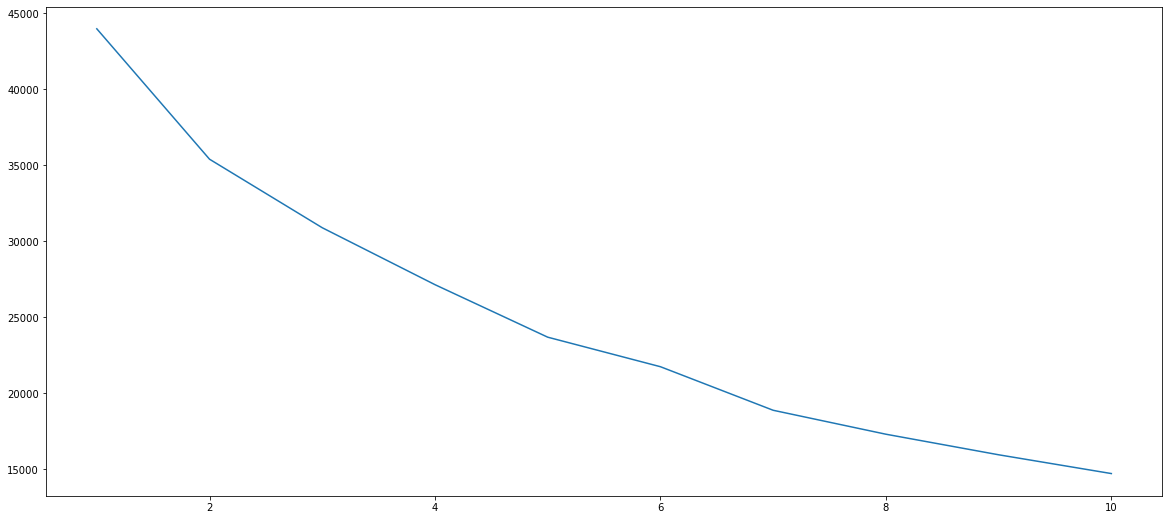

In [39]:
plt.figure(figsize=(20,9))
plt.plot(range(1,11),wcss)
plt.show()

## So from above can see that there is less decrease after 5 so optimal value 5

# 2.Silhouette score

In [40]:
from sklearn.metrics import silhouette_score

In [42]:
sc=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=99)
    cluster_labels=model.fit_predict(scaled)
    sc_avg=silhouette_score(scaled,cluster_labels)
    sc.append(sc_avg)
sc

[0.32542136327826215,
 0.30968432252177197,
 0.3079913268658421,
 0.32408855102758116,
 0.21047750249031483,
 0.2836386717175156,
 0.23679824274462632,
 0.24526526636556453,
 0.26212758647767764]

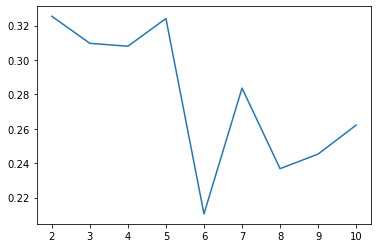

In [43]:
plt.plot(range(2,11),sc)
plt.show()

## we got peak at 2 so 2 is optimal value 

# 3.Calinski harabasz score

In [44]:
from sklearn.metrics import calinski_harabasz_score

In [46]:
values=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=99)
    labels = model.fit_predict(scaled)
    calinski=calinski_harabasz_score(scaled,labels)
    values.append(calinski)
values    

[968.4467399846608,
 846.2709099000086,
 825.5287346855237,
 854.7615622366235,
 816.0264600053574,
 883.8714351295039,
 878.1722778424346,
 875.5957219917663,
 880.5819711777257]

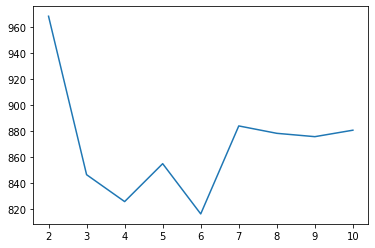

In [47]:
plt.plot(range(2,11),values)
plt.show()

## we can see that score high for no.of clusters=2

## So we construct using no.of clusters=2

In [58]:
model=KMeans(n_clusters=2,random_state=77)
y1=model.fit_predict(scaled)

In [59]:
air_lines_2=air_lines.copy()

In [60]:
air_lines_2['clusters']=y1

In [61]:
air_lines_2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


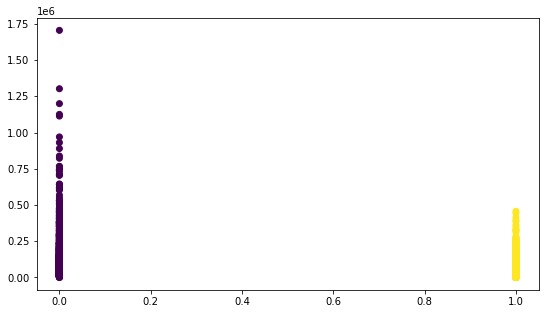

In [98]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_2['clusters'],air_lines['Balance'], c=model.labels_)

# DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan=DBSCAN()

In [64]:
labels=dbscan.fit_predict(scaled)

In [66]:
air_lines_3=air_lines.copy()
air_lines_3['clusters']=labels

In [67]:
air_lines_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [69]:
air_lines_3['clusters'].value_counts()

 0     1453
-1     1413
 1      268
 5      235
 6      173
 9      115
 3      114
 4      111
 8       52
 10      21
 13       9
 12       9
 14       6
 11       5
 7        5
 2        5
 15       5
Name: clusters, dtype: int64

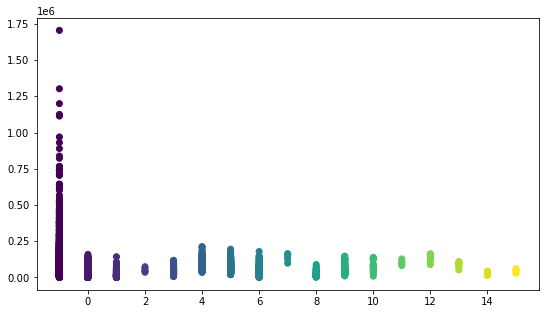

In [97]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_3['clusters'],air_lines['Balance'], c=dbscan.labels_)

## eps=1

In [70]:
dbscan1=DBSCAN(eps=1)

In [71]:
labels=dbscan1.fit_predict(scaled)

In [73]:
air_lines_3['clusters2']=labels

In [74]:
air_lines_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters2
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,1


In [75]:
air_lines_3['clusters2'].value_counts()

 0    2319
 1    1093
-1     554
 2      13
 5       9
 3       6
 4       5
Name: clusters2, dtype: int64

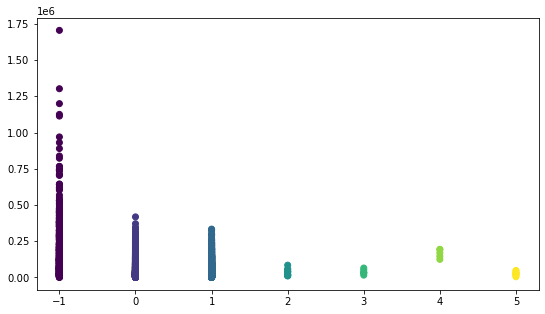

In [96]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_3['clusters2'],air_lines['Balance'], c=dbscan1.labels_)

## eps=1.5

In [78]:
dbscan2=DBSCAN(eps=1.5)
labels=dbscan2.fit_predict(scaled)
air_lines_3['clusters3']=labels
air_lines_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters2,clusters3
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,1,1


In [79]:
air_lines_3['clusters3'].value_counts()

 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: clusters3, dtype: int64

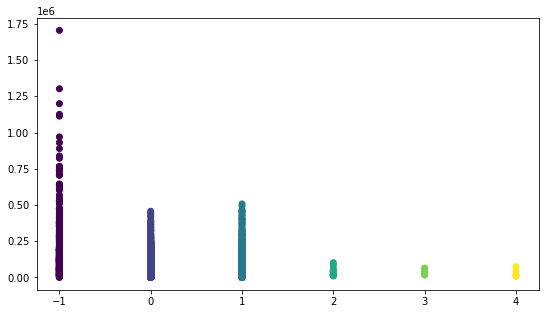

In [94]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_3['clusters3'],air_lines['Balance'], c=dbscan2.labels_)

## eps=2

In [81]:
dbscan3=DBSCAN(eps=2)
labels=dbscan3.fit_predict(scaled)
air_lines_3['clusters4']=labels
air_lines_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters2,clusters3,clusters4
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,1,1,1


In [82]:
air_lines_3['clusters4'].value_counts()

 0    2453
 1    1330
-1     179
 2      16
 3       9
 4       7
 5       5
Name: clusters4, dtype: int64

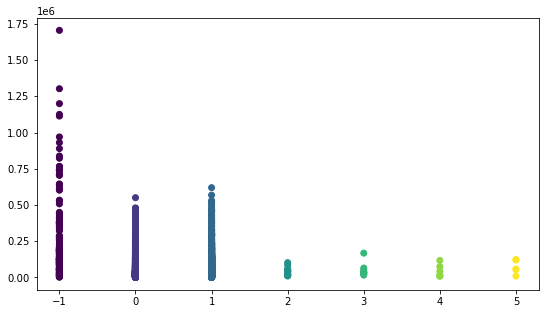

In [93]:
# Plotting Clusters
plt.figure(figsize=(9, 5))  
plt.scatter(air_lines_3['clusters4'],air_lines['Balance'], c=dbscan3.labels_)

## eps=2.5

In [87]:
dbscan4=DBSCAN(eps=2.5)
labels=dbscan4.fit_predict(scaled)
air_lines_3['clusters5']=labels
air_lines_3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters,clusters2,clusters3,clusters4,clusters5
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,1,1,1,0


In [88]:
air_lines_3['clusters5'].value_counts()

 0    3865
-1      98
 1      23
 2      13
Name: clusters5, dtype: int64

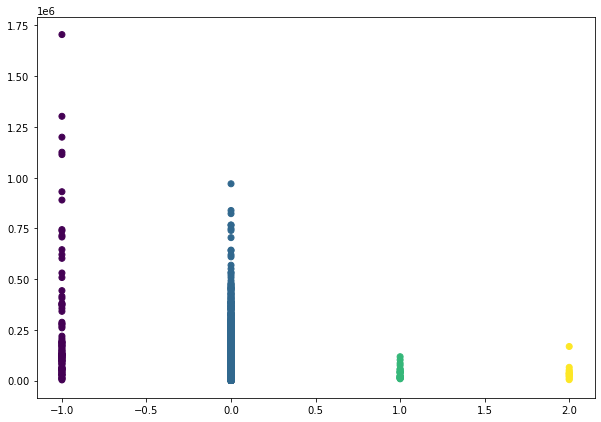

In [92]:
# Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air_lines_3['clusters5'],air_lines['Balance'], c=dbscan4.labels_)

# With different values of eps we will get different clusters and outliers